In [1]:
%matplotlib inline
import os
import pandas as pd
import numpy as np
import datetime as dt
from math import sqrt
import matplotlib.pyplot as plt
filepath = 'C:/Users/Anthony/Dropbox/Background Understanding/Data Science/CDIPS/CDIPS15_TeamCat/data/competition_data/'
files = [x for x in os.listdir(filepath)] #if os.path.isfile(os.path.join(filepath,x)) if you want to check isfile
print '# of files:', len(files), '\n\n', files
print '\n\n'

for i in files:
    name = filepath + i
    df = pd.read_csv(name)
    print i
    print 
    print df.head()
    print '\n\n'


# of files: 21 

['bill_of_materials.csv', 'components.csv', 'comp_adaptor.csv', 'comp_boss.csv', 'comp_elbow.csv', 'comp_float.csv', 'comp_hfl.csv', 'comp_nut.csv', 'comp_other.csv', 'comp_sleeve.csv', 'comp_straight.csv', 'comp_tee.csv', 'comp_threaded.csv', 'specs.csv', 'test_set.csv', 'train_set.csv', 'tube.csv', 'tube_end_form.csv', 'type_component.csv', 'type_connection.csv', 'type_end_form.csv']



bill_of_materials.csv

  tube_assembly_id component_id_1  quantity_1 component_id_2  quantity_2  \
0         TA-00001         C-1622           2         C-1629           2   
1         TA-00002         C-1312           2            NaN         NaN   
2         TA-00003         C-1312           2            NaN         NaN   
3         TA-00004         C-1312           2            NaN         NaN   
4         TA-00005         C-1624           1         C-1631           1   

  component_id_3  quantity_3 component_id_4  quantity_4 component_id_5  \
0            NaN         NaN         

## Initial Thoughts

My first goal is to get a look at each file and get an intuitive understanding of the importance of each one. In this case, I can classify which files are of 1st order importance, 2nd order importance, etc... I also looked at Bharat's notebook from the day before as well where he looked through several files.

For example, `type_end_form.csv`, `type_connection.csv`, `tube_end_form.csv` or `type_component.csv` does not seem immediately important right now.

Next, the `comp_` files seem to be good for second order corrections. `components.csv` will seem useful to relate component_id and the component_type where we can groupby component_type in the future when performing second order corrections.

I will first focus on `bill_of_materials.csv`, `specs.csv`, and `tube.csv`

In [2]:
files

['bill_of_materials.csv',
 'components.csv',
 'comp_adaptor.csv',
 'comp_boss.csv',
 'comp_elbow.csv',
 'comp_float.csv',
 'comp_hfl.csv',
 'comp_nut.csv',
 'comp_other.csv',
 'comp_sleeve.csv',
 'comp_straight.csv',
 'comp_tee.csv',
 'comp_threaded.csv',
 'specs.csv',
 'test_set.csv',
 'train_set.csv',
 'tube.csv',
 'tube_end_form.csv',
 'type_component.csv',
 'type_connection.csv',
 'type_end_form.csv']

In [3]:
name = filepath + files[0]
billdf = pd.read_csv(name)
print billdf.shape
print sum(pd.isnull(billdf['tube_assembly_id'].unique())) # No null values
print len(billdf['tube_assembly_id'].unique()) == len(billdf) # Each one is a unique tube assembly
billdf.head()

(21198, 17)
0
True


,tube_assembly_id,component_id_1,quantity_1,component_id_2,quantity_2,component_id_3,quantity_3,component_id_4,quantity_4,component_id_5,quantity_5,component_id_6,quantity_6,component_id_7,quantity_7,component_id_8,quantity_8
0,TA-00001,C-1622,2,C-1629,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,TA-00002,C-1312,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,TA-00003,C-1312,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,TA-00004,C-1312,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,TA-00005,C-1624,1,C-1631,1,C-1641,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Each row is a unique tube assembly in `bill_of_materials.csv`

Number of quantity_1 : 29870.0
Number of quantity_2 : 22565.0
Number of quantity_3 : 4897.0
Number of quantity_4 : 625.0
Number of quantity_5 : 95.0
Number of quantity_6 : 30.0
Number of quantity_7 : 7.0
Number of quantity_8 : 1.0


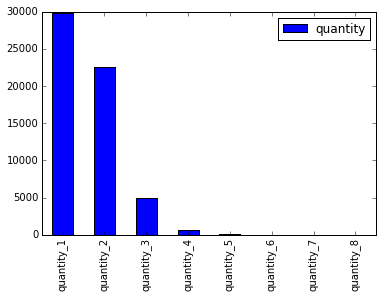

In [4]:
sumdata = []
dataname = []
for x in range(2,len(billdf.columns),2):
    column = billdf.columns[x]
    copy = billdf[column].copy().replace('NaN',0)
    print "Number of", column, ":", sum(copy)
    sumdata.append(sum(copy))
    dataname.append(column)
    
pd.DataFrame({'quantity':sumdata}, index = dataname).plot(kind='bar')


Most of the pieces are 2 piece assemblies (any quantity_2 has quantity_1)

In [5]:
test = billdf[billdf['quantity_1'] < billdf['quantity_2']]
print test.loc[:,test.columns[0:5]].shape
test.loc[:,test.columns[0:5]].head()

(88, 5)


,tube_assembly_id,component_id_1,quantity_1,component_id_2,quantity_2
68,TA-00069,C-1374,1,C-1369,2
102,TA-00103,C-1521,1,C-1831,4
111,TA-00112,C-0055,1,C-0056,5
349,TA-00350,C-1535,1,C-1626,2
863,TA-00864,C-1536,1,C-1625,2


There are cases where there are more `component_id_2` than `component_id_1`. Let's look at the true distribution of quantity types

14786 6412
(21198, 17)
Number of quantity_1 : 19149
Number of quantity_2 : 14786
Number of quantity_3 : 4798
Number of quantity_4 : 608
Number of quantity_5 : 92
Number of quantity_6 : 26
Number of quantity_7 : 7
Number of quantity_8 : 1
[4363, 9988, 4190, 516, 66, 19, 6, 1]
19149


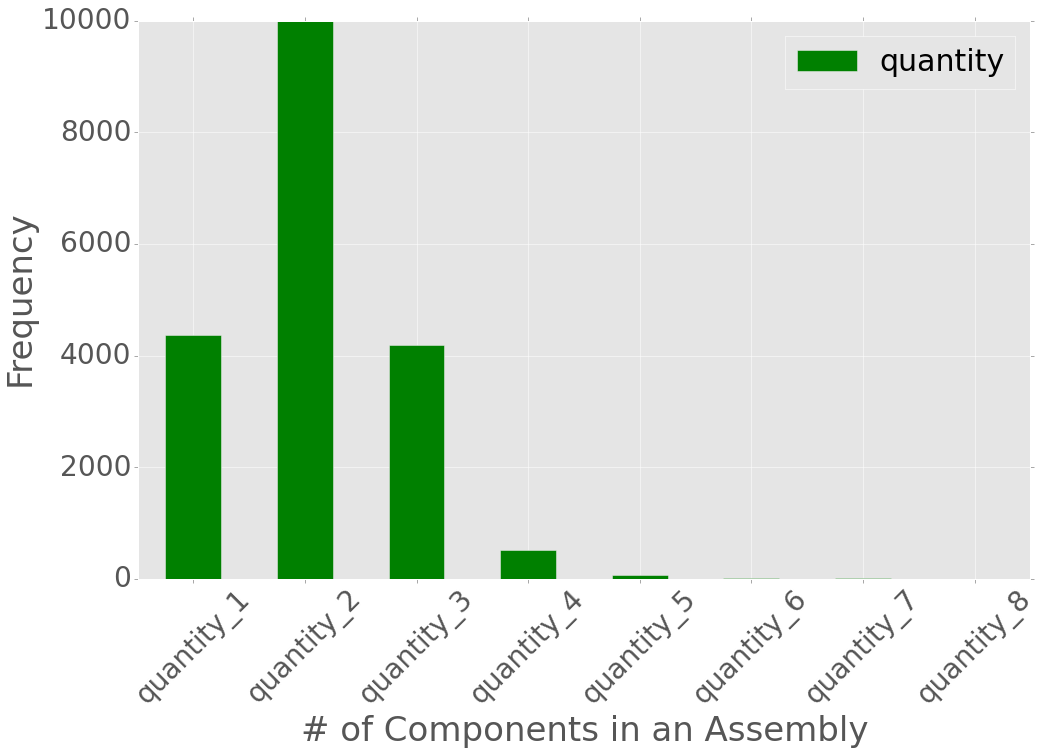

In [14]:
print sum(pd.notnull(billdf['quantity_2'])), sum(pd.isnull(billdf['quantity_2']))
print billdf.shape

sdata = []
for x in range(2,len(billdf.columns),2):
    column = billdf.columns[x]
    copy = billdf[column].copy()
    print "Number of", column, ":", sum(pd.notnull(copy))
    sdata.append(sum(pd.notnull(copy)))
sdata = [sdata[x] - sdata[x+1] for x in range(len(sdata)-1)]
sdata.append(1)
print sdata
print sum(sdata)
plt.style.use('ggplot')
pd.DataFrame({'quantity':sdata}, index = dataname).plot(kind='bar', color = 'green', figsize = (16,10))
plt.legend(prop={'size':30})
plt.xlabel('# of Components in an Assembly', fontsize = 34)
plt.ylabel('Frequency', fontsize = 34)
plt.tick_params(labelsize = 28)
plt.xticks(rotation=45)
plt.savefig('componentQuant.png')

More 2 component type assemblies. How many many pieces of each the components?

In [8]:
print 'quantity_1'
print billdf['quantity_2'].value_counts()
print 
print 'quantity_2'
print billdf['quantity_2'].value_counts()
print
print 'quantity_3'
print billdf['quantity_3'].value_counts()

quantity_1
2    7696
1    7062
4      22
3       4
6       1
5       1
dtype: int64

quantity_2
2    7696
1    7062
4      22
3       4
6       1
5       1
dtype: int64

quantity_3
1    4709
2      82
3       4
4       3
dtype: int64


### Note:

Could not use `df.fillna(0)` because the fillna doesn't recognize `NaN` as na. In the end, I decided to simply `replace('NaN',0)` 

In [9]:
test =billdf['quantity_1'].copy()
print '# of NaN:',sum(pd.isnull(test))
test2 = test[pd.isnull(test)]
print type(np.nan)
print type(test2[18])
print test2[18] == np.nan
print test2.head()


# of NaN: 2049
<type 'float'>
<type 'numpy.float64'>
False
18   NaN
43   NaN
63   NaN
69   NaN
73   NaN
Name: quantity_1, dtype: float64


## Looking at test

It looks like 89% of the data comes from 2011-2014 for both the test and training datasets. We don't need to care about inflation.

2013    20118
2012     3358
2014     1929
2011     1641
2008      478
2010      419
2009      410
2007      400
2006      229
2002      187
2005      180
2004      170
2000      156
2001      146
2003       91
1999       79
1997       63
1996       47
1998       29
1995       28
2015       22
1994        9
1982        6
1993        4
1992        3
2016        3
1988        2
1989        2
1991        2
1987        1
2017        1
dtype: int64
0.895177572568


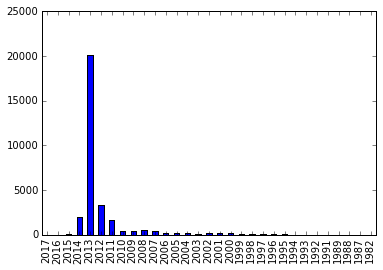

In [10]:
name = filepath + 'train_set.csv'
traindf = pd.read_csv(name, parse_dates = ['quote_date'])
name = filepath + 'test_set.csv'
testdf = pd.read_csv(name,  parse_dates = ['quote_date'])
traindf['year'] = traindf['quote_date'].dt.year
testdf['year'] = testdf['quote_date'].dt.year
print traindf['year'].value_counts()
traindf['year'].value_counts().sort_index(ascending = False).plot(kind='bar')
print sum(traindf['year'].value_counts()[0:4])/float(sum(traindf['year'].value_counts()))

2013    20051
2012     3297
2014     1986
2011     1640
2010      508
2007      486
2008      439
2009      373
2006      230
2002      189
2005      186
2000      158
2004      147
2001      130
2003      120
1999       94
1998       54
1997       51
1995       29
1996       18
2015       13
1992       11
1987        8
1993        6
1994        5
2016        2
1988        1
1989        1
2017        1
1985        1
dtype: int64
0.892144865222


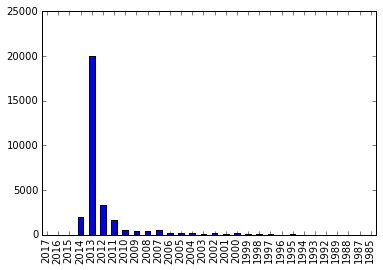

In [11]:
print testdf['year'].value_counts()
testdf['year'].value_counts().sort_index(ascending = False).plot(kind = 'bar')
print sum(testdf['year'].value_counts()[0:4])/float(sum(testdf['year'].value_counts()))

## Corrected years plot due to bracket pricing

Because of bracket pricing, some years artificially show up many more times than others. Therefore, I only use one 'year' per 'tube_assembly_id'. `max()`, `head(1)`, `tail(1)`, `min()` all work. 

In [12]:
trainyears = traindf[['tube_assembly_id','year']]
testyears = testdf[['tube_assembly_id','year']]
trainyears = trainyears.groupby('tube_assembly_id').max()
testyears = testyears.groupby('tube_assembly_id').max()

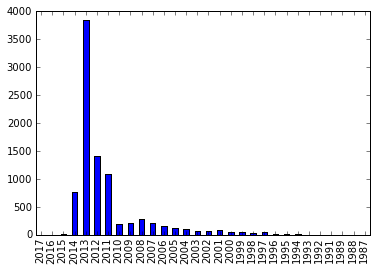

In [13]:
trainyears['year'].value_counts().sort_index(ascending = False).plot(kind='bar')

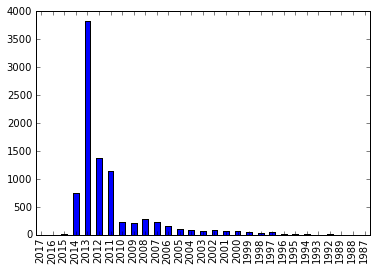

In [14]:
testyears['year'].value_counts().sort_index(ascending = False).plot(kind='bar')

In [15]:
print traindf.columns
print traindf.shape
traindf.head(20)


Index([u'tube_assembly_id', u'supplier', u'quote_date', u'annual_usage',
       u'min_order_quantity', u'bracket_pricing', u'quantity', u'cost',
       u'year'],
      dtype='object')
(30213, 9)


,tube_assembly_id,supplier,quote_date,annual_usage,min_order_quantity,bracket_pricing,quantity,cost,year
0,TA-00002,S-0066,2013-07-07,0,0,Yes,1,21.905933,2013
1,TA-00002,S-0066,2013-07-07,0,0,Yes,2,12.341214,2013
2,TA-00002,S-0066,2013-07-07,0,0,Yes,5,6.601826,2013
3,TA-00002,S-0066,2013-07-07,0,0,Yes,10,4.687770,2013
4,TA-00002,S-0066,2013-07-07,0,0,Yes,25,3.541561,2013
5,TA-00002,S-0066,2013-07-07,0,0,Yes,50,3.224406,2013
6,TA-00002,S-0066,2013-07-07,0,0,Yes,100,3.082521,2013
7,TA-00002,S-0066,2013-07-07,0,0,Yes,250,2.999060,2013
8,TA-00004,S-0066,2013-07-07,0,0,Yes,1,21.972702,2013
9,TA-00004,S-0066,2013-07-07,0,0,Yes,2,12.407983,2013


In [16]:
t = pd.merge(traindf, billdf, on ='tube_assembly_id')
print t.iloc[0:20,[0,1,9,10,11,12,13,14]]

   tube_assembly_id supplier component_id_1  quantity_1 component_id_2  \
0          TA-00002   S-0066         C-1312           2            NaN   
1          TA-00002   S-0066         C-1312           2            NaN   
2          TA-00002   S-0066         C-1312           2            NaN   
3          TA-00002   S-0066         C-1312           2            NaN   
4          TA-00002   S-0066         C-1312           2            NaN   
5          TA-00002   S-0066         C-1312           2            NaN   
6          TA-00002   S-0066         C-1312           2            NaN   
7          TA-00002   S-0066         C-1312           2            NaN   
8          TA-00004   S-0066         C-1312           2            NaN   
9          TA-00004   S-0066         C-1312           2            NaN   
10         TA-00004   S-0066         C-1312           2            NaN   
11         TA-00004   S-0066         C-1312           2            NaN   
12         TA-00004   S-0066         C

## Tube Exploration


In [17]:
name = filepath + 'tube.csv'
tubedf = pd.read_csv(name)
print tubedf.shape
tubedf.head()

(21198, 16)


,tube_assembly_id,material_id,diameter,wall,length,num_bends,bend_radius,end_a_1x,end_a_2x,end_x_1x,end_x_2x,end_a,end_x,num_boss,num_bracket,other
0,TA-00001,SP-0035,12.70,1.65,164,5,38.10,N,N,N,N,EF-003,EF-003,0,0,0
1,TA-00002,SP-0019,6.35,0.71,137,8,19.05,N,N,N,N,EF-008,EF-008,0,0,0
2,TA-00003,SP-0019,6.35,0.71,127,7,19.05,N,N,N,N,EF-008,EF-008,0,0,0
3,TA-00004,SP-0019,6.35,0.71,137,9,19.05,N,N,N,N,EF-008,EF-008,0,0,0
4,TA-00005,SP-0029,19.05,1.24,109,4,50.80,N,N,N,N,EF-003,EF-003,0,0,0


In [18]:
print '# of unique diameters:', len(tubedf['diameter'].unique())
print '# of unique wall thicknesses:', len(tubedf['wall'].unique())
print '# of unique lengths:', len(tubedf['length'].unique())
print '# of unique bends:', len(tubedf['num_bends'].unique())
print '# of unique bend radii:', len(tubedf['bend_radius'].unique())

# of unique diameters: 57
# of unique wall thicknesses: 34
# of unique lengths: 462
# of unique bends: 18
# of unique bend radii: 137


Diameter


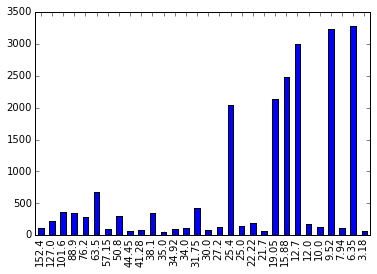

In [19]:
# test = tubedf.groupby('diameter').count()
print 'Diameter'
tubedf['diameter'].value_counts().head(30).sort_index(ascending=False).plot(kind='bar')

Wall


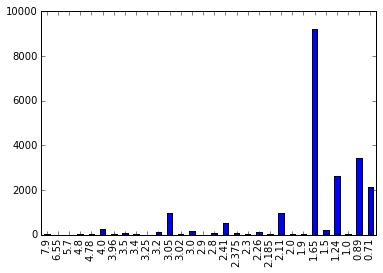

In [20]:
print 'Wall'
tubedf['wall'].value_counts().head(30).sort_index(ascending=False).plot(kind='bar')

Lengths


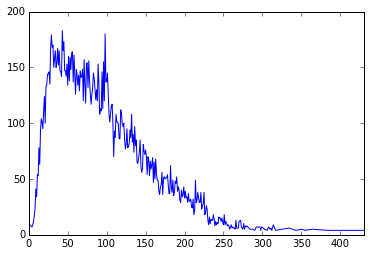

In [21]:
print 'Lengths'
tubedf['length'].value_counts().head(300).sort_index(ascending=True).plot()

Bends


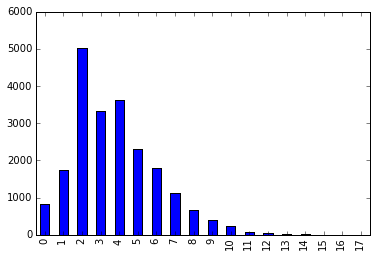

In [22]:
print 'Bends'
tubedf['num_bends'].value_counts().sort_index(ascending=True).plot(kind = 'bar')

Bend Radii
Max radius: 9999.0

19.05      4329
38.10      3997
50.80      3051
31.75      1793
25.40      1588
63.50      1169
101.60     1008
0.00        819
76.20       569
152.40      528
127.00      424
12.70       321
30.00       197
70.00       189
88.90       124
90.00       116
45.00       112
139.70       83
114.30       63
25.00        60
55.00        58
80.00        48
67.50        47
19.00        46
110.00       38
31.80        29
177.80       28
35.00        26
203.20       26
180.00       24
15.00        21
254.00       20
23.82        13
33.33        11
50.00        10
20.00        10
9999.00       8
19.50         8
190.50        8
19.10         7
22.22         7
28.50         6
60.00         6
33.00         5
28.58         4
130.00        4
62.50         4
146.05        4
530.00        4
15.87         4
dtype: int64


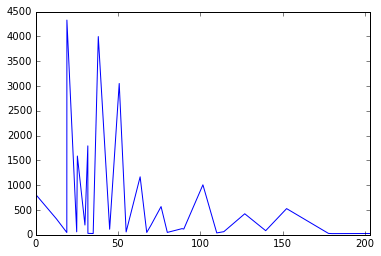

In [23]:
print 'Bend Radii'
print 'Max radius:', max(tubedf['bend_radius'].value_counts().index)
print
print tubedf['bend_radius'].value_counts().head(50)
tubedf['bend_radius'].value_counts().head(30).sort_index(ascending=True).plot()

In [28]:
print 'end a 1x'
print tubedf['end_a_1x'].value_counts()
print len(tubedf['end_a_1x'][tubedf['end_a_1x'] == 'Y'])/float(len(tubedf['end_a_1x']))

end a 1x
N    20118
Y     1080
dtype: int64
0.0509482026606


In [29]:
print 'end a 2x'
print tubedf['end_a_2x'].value_counts()
print len(tubedf['end_a_2x'][tubedf['end_a_2x'] == 'Y'])/float(len(tubedf['end_a_2x']))

end a 2x
N    18015
Y     3183
dtype: int64
0.150155675064


In [30]:
print 'end x 1x'
print tubedf['end_x_1x'].value_counts()
print len(tubedf['end_x_1x'][tubedf['end_x_1x'] == 'Y'])/float(len(tubedf['end_x_1x']))

end x 1x
N    20377
Y      821
dtype: int64
0.0387300688744


In [31]:
print 'end x 2x'
print tubedf['end_x_2x'].value_counts()
print len(tubedf['end_x_2x'][tubedf['end_x_2x'] == 'Y'])/float(len(tubedf['end_x_2x']))

end x 2x
N    18493
Y     2705
dtype: int64
0.12760637796


end x and end_a
25
27
3207
0.151287857345
Axes(0.125,0.125;0.775x0.775)
Axes(0.125,0.125;0.775x0.775)


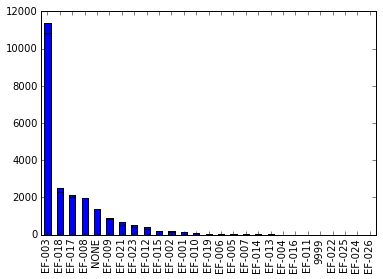

In [43]:
print 'end x and end_a'
print len(tubedf['end_a'].unique())
print len(tubedf['end_x'].unique())
eqltest = [tubedf['end_a'][i] != tubedf['end_x'][i] for i in range(len(tubedf['end_a']))]
print sum(eqltest)
print sum(eqltest)/float(len(eqltest))
tubedf['end_a'].value_counts().plot(kind = 'bar')

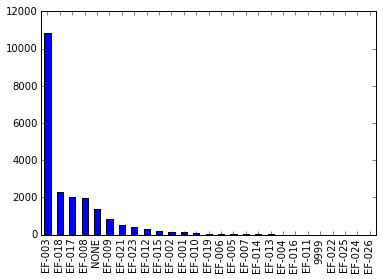

In [44]:
tubedf['end_x'].value_counts().plot(kind = 'bar')

num_boss and num_bracket
6
6
838
0.0395320313237
0    20461
1      583
2      112
3       34
4        6
5        2
dtype: int64


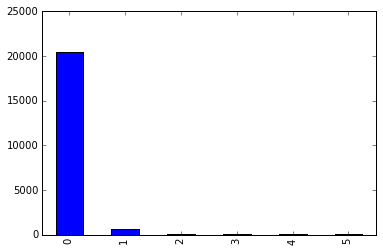

In [49]:
print 'num_boss and num_bracket'
print len(tubedf['num_boss'].unique())
print len(tubedf['num_bracket'].unique())
eqltest2 = [tubedf['num_boss'][i] != tubedf['num_bracket'][i] for i in range(len(tubedf['num_boss']))]
print sum(eqltest2)
print sum(eqltest2)/float(len(eqltest2))
tubedf['num_boss'].value_counts().plot(kind = 'bar')
print tubedf['num_boss'].value_counts()

0    21079
1      102
2       13
3        2
5        1
4        1
dtype: int64


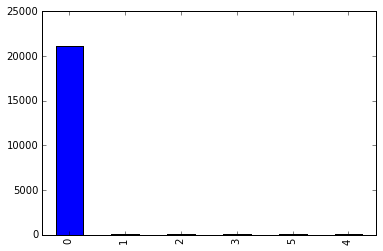

In [50]:
tubedf['num_bracket'].value_counts().plot(kind = 'bar')
print tubedf['num_bracket'].value_counts()

other
8
0    20831
1      290
2       61
3        7
5        3
4        3
6        2
8        1
dtype: int64


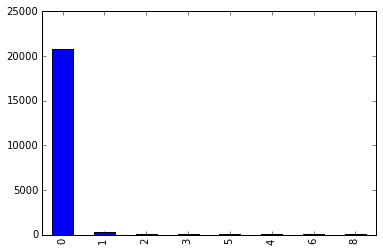

In [53]:
print 'other'
print len(tubedf['other'].unique())
print tubedf['other'].value_counts()
tubedf['other'].value_counts().plot(kind = 'bar')

In [56]:
eqltest3 = [tubedf['other'][i] != tubedf['num_bracket'][i] for i in range(len(tubedf['num_bracket']))]
eqltest4 = [tubedf['other'][i] != tubedf['num_boss'][i] for i in range(len(tubedf['num_boss']))]
print sum(eqltest3)/float(len(eqltest3))
print sum(eqltest4)/float(len(eqltest4))

0.0212284177753
0.0474101330314


In [80]:
eqltest5 = [(tubedf['num_bracket'][i] != tubedf['num_boss'][i]) | (tubedf['other'][i] != tubedf['num_boss'][i]) | (tubedf['other'][i] != tubedf['num_bracket'][i])  for i in range(len(tubedf['num_boss']))]
print sum(eqltest5)/float(len(eqltest5))
print pd.Series(eqltest5).value_counts()

def mean(x):
    return float(sum(x))/len(x)
'''
def variance(x):
    return mean([(int(i) - mean(x))**2 for i in x])
def std(x):
    return sqrt(variance(x))
'''
mean = mean(eqltest5)
print 'mean:', mean
prevar = [(int(i) - mean)**2 for i in eqltest5]
variance = sum(prevar)/len(prevar)
print 'variance:', variance
print 'std:', sqrt(variance)
'''
print 'variance:', variance(eqltest5)
print 'std:', std(eqltest5)
'''


0.0535427870554
False    20063
True      1135
dtype: int64
mean: 0.0535427870554
variance: 0.0506759570097
std: 0.225113209319


"\nprint 'variance:', variance(eqltest5)\nprint 'std:', std(eqltest5)\n"

In [81]:
.225**2

0.050625